#                                Project: Titanic Survival Exploration 2 

## Importando as bibliotecas para analise de dados e gráficos

In [1]:
import numpy as np
import pandas as pd
# Definindo os algarismos significativos a serem apresentados nas tabelas.
pd.options.display.float_format = '{:.3f}'.format  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Carregando os dados e verificando o conteúdo.

In [2]:
df_train = pd.read_csv('data/train.csv')
df_infer = pd.read_csv('data/test.csv')

In [3]:
# Aspecto da tabela de dados para treino
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [4]:
# Aspecto dos dados da tabela para inferencia.
df_infer.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


#### Identificando as colunas

* PassengerId: Número de identificação do passageiro;

* Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;

* Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;

* Name: Nome do passageiro;

* Sex: Sexo do passageiro;

* Age: Idade do passageiro em anos;

* SibSp: Quantidade de irmãos e cônjuges a bordo ;

* Parch: Quantidade de pais e filhos a bordo;

* Ticket: Número da passagem;

* Fare: Preço da passagem;

* Cabin: Número da cabine do passageiro;

* Embarked: Porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

In [5]:
# Verificando as dimensões dos data frames
print("Dimensoes da matriz de treino: ",df_train.shape)
print("Dimensoes da matriz de inferencia: ",df_infer.shape)

Dimensoes da matriz de treino:  (891, 12)
Dimensoes da matriz de inferencia:  (418, 11)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.000,1,1,2690,7.229,NaN,C
363,364,0,3,"Asim, Mr. Adola",male,35.000,0,0,SOTON/O.Q. 3101310,7.050,NaN,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.000,0,0,230434,13.000,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,nan,0,0,113056,26.000,A19,S
601,602,0,3,"Slabenoff, Mr. Petco",male,nan,0,0,349214,7.896,NaN,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,nan,1,0,367230,15.500,NaN,Q
159,160,0,3,"Sage, Master. Thomas Henry",male,nan,8,2,CA. 2343,69.550,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.000,1,0,2908,26.000,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.000,0,0,36967,34.021,D46,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000,0,0,350043,7.796,NaN,S


In [8]:
print('Train columns with null values:\n', df_train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', df_infer.isnull().sum())
print("-"*10)

df_train.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000,891.000,891.000,891,891,714.000,891.000,891.000,891,891.000,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"Berriman, Mr. William John",male,nan,nan,nan,347082,nan,C23 C25 C27,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446.000,0.384,2.309,NaN,NaN,29.699,0.523,0.382,NaN,32.204,NaN,NaN
std,257.354,0.487,0.836,NaN,NaN,14.526,1.103,0.806,NaN,49.693,NaN,NaN
min,1.000,0.000,1.000,NaN,NaN,0.420,0.000,0.000,NaN,0.000,NaN,NaN
25%,223.500,0.000,2.000,NaN,NaN,20.125,0.000,0.000,NaN,7.910,NaN,NaN
50%,446.000,0.000,3.000,NaN,NaN,28.000,0.000,0.000,NaN,14.454,NaN,NaN
75%,668.500,1.000,3.000,NaN,NaN,38.000,1.000,0.000,NaN,31.000,NaN,NaN


### Fração de sobreviventes

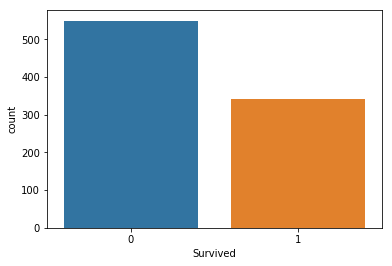

In [9]:
sns.countplot(x='Survived', data=df_train);

### Verificando a relação entre o gênero e o número de sobreviventes.

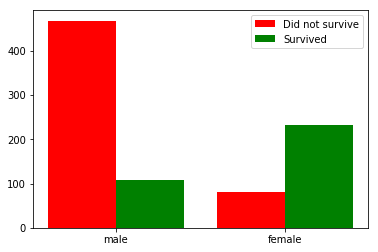

In [10]:
male = [0,0]; female = [0,0]; surv_bar = [0,0]
color_bar = ['r', 'g']; bar_pos = [-0.4,0.0,0.6,1.0]
bar_width = 0.4
for i in [0,1]:
    male[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'male').sum()
    female[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'female').sum()
    surv_bar[i] = plt.bar(bar_pos[i], male[i], width = bar_width, color = color_bar[i])
    plt.bar(bar_pos[i+2], female[i], width = bar_width, color = color_bar[i])
plt.xticks([-0.2,0.8], ['male', 'female'])  
plt.legend((surv_bar[0],surv_bar[1]),('Did not survive', 'Survived'), framealpha = 0.8);

In [11]:
print("Fração de mulheres sobreviventes: %0.2f " % (female[1]/(female[1]+female[0])))

Fração de mulheres sobreviventes: 0.74 


In [12]:
print("Fração de homens sobreviventes: %0.2f " % (male[1]/(male[1]+male[0])))

Fração de homens sobreviventes: 0.19 


Verificamos que a maioria dos sobreviventes foram mulheres. 

In [13]:
def survival_count(x):
    return len(x[x==1])/len(x)*100.0

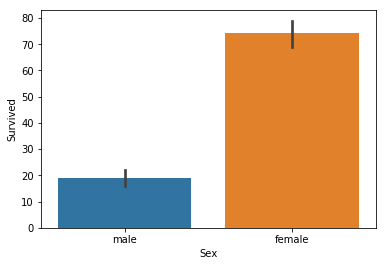

In [14]:
sns.barplot(x="Sex",y="Survived", data=df_train, estimator=survival_count);

In [15]:
Pclass_surv = df_train.groupby('Pclass', as_index=False)['Survived'].mean()

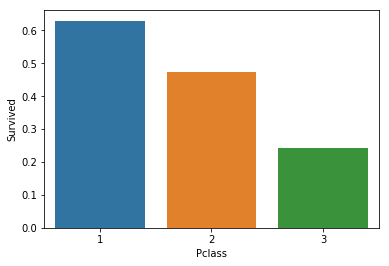

In [16]:
sns.barplot(x="Pclass", y="Survived", data=Pclass_surv);

### Verificando a idade dos sobreviventes 

In [17]:
import matplotlib.style
import matplotlib as mpl

In [18]:
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rbgcmyk')

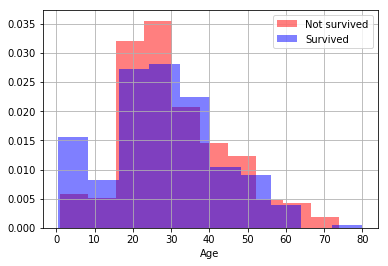

In [19]:
df_train.groupby('Survived').Age.hist(alpha=0.5, density = True)
plt.xlabel("Age")
plt.legend(["Not survived", "Survived"]);

### Verificando a correlação entre as propriedades

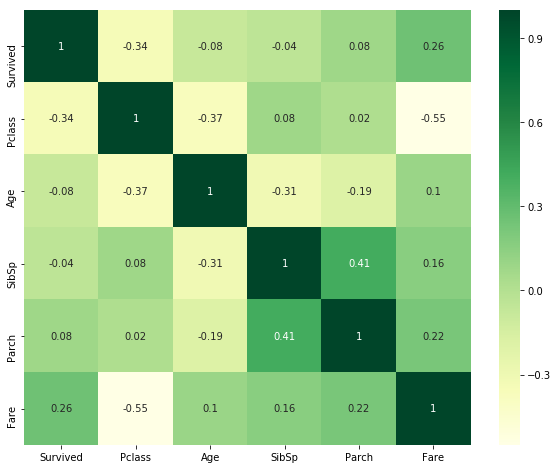

In [20]:
cor_matrix = df_train.drop(columns=['PassengerId']).corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(10,8));
sns.heatmap(cor_matrix, annot=True, cmap="YlGn");

## Removendo dados irrelevantes

Observa-se que nos dados de teste, apareceu valores NaN para 'Cabin'. Além de conter NaN nos testes, esta informação poderia sugerir que, conforme o número da cabine, o passageiro pode ser de primeira, segunda, ou terceira classe, o que permite especular que a primeira classe teria acesso fácil para sair do navio. No entanto, já existe uma coluna classificando o passageiro pela classe, tornado o número da cabine uma informação redundante.

Também é claro que o 'Name' e o número do 'Ticket' não exerceriam qualquer influência na pessoa se salvar do naufrágio.

Removemos estas três.

In [21]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_infer.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

Entendo que o local de partida também não influencia na sobrevivência

In [22]:
df_train.drop(['Embarked'], axis = 1, inplace = True)
df_infer.drop(['Embarked'], axis = 1, inplace = True)

## One-hot encoding

Na análise acima, observamos que o gênero foi importante para definir quem iria se salvar. Como esta variável é categórica, male e female, precisamos construir uma tabela binária para classificar cada um dos gêneros. A construção desta tabela binária chama-se *One-hot enconding*. 

In [23]:
train = pd.get_dummies(df_train)
infer = pd.get_dummies(df_infer)

In [24]:
train = pd.concat([train, pd.get_dummies(train['Pclass'], prefix='Pclass')], axis=1)
train = train.drop('Pclass', axis=1)
infer = pd.concat([infer, pd.get_dummies(infer['Pclass'], prefix='Pclass')], axis=1)
infer = infer.drop('Pclass', axis=1)

In [25]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000,1,0,7.250,0,1,0,0,1
1,2,1,38.000,1,0,71.283,1,0,1,0,0
2,3,1,26.000,0,0,7.925,1,0,0,0,1
3,4,1,35.000,1,0,53.100,1,0,1,0,0
4,5,0,35.000,0,0,8.050,0,1,0,0,1


In [26]:
infer.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.500,0,0,7.829,0,1,0,0,1
1,893,47.000,1,0,7.000,1,0,0,0,1
2,894,62.000,0,0,9.688,0,1,0,1,0
3,895,27.000,0,0,8.662,0,1,0,0,1
4,896,22.000,1,1,12.287,1,0,0,0,1


## Tratando os missing numbers (NaN)

In [27]:
# Verificando o numero de missing numbers com .isnull()
train.isnull().sum().sort_values(ascending = False)

Age            177
Pclass_3         0
Pclass_2         0
Pclass_1         0
Sex_male         0
Sex_female       0
Fare             0
Parch            0
SibSp            0
Survived         0
PassengerId      0
dtype: int64

In [28]:
infer.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Pclass_3        0
Pclass_2        0
Pclass_1        0
Sex_male        0
Sex_female      0
Parch           0
SibSp           0
PassengerId     0
dtype: int64

In [29]:
# Preenchendo os valores nulos das idades com a media
train['Age'].fillna(train['Age'].mean(), inplace = True)
infer['Age'].fillna(infer['Age'].mean(), inplace = True)

In [30]:
infer['Fare'].fillna(infer['Fare'].mean(), inplace= True)

In [31]:
# Verificando a substituição
train.isnull().sum().sort_values(ascending = False)

Pclass_3       0
Pclass_2       0
Pclass_1       0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Survived       0
PassengerId    0
dtype: int64

In [32]:
infer.isnull().sum().sort_values(ascending = False)

Pclass_3       0
Pclass_2       0
Pclass_1       0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
PassengerId    0
dtype: int64

## Classificador:  Machine Learning

### Separando os features e targets:

In [33]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

### Separando os dados para treino e validação 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# shuffle=True é padrão, o arquivo de dados é embaralhado antes de separar
# em treino e teste, não precisa declarar.

### Definindo o classificador

In [35]:
from sklearn.tree import DecisionTreeClassifier
# Definindo os parâmetros para o classificador
param = {} # Criando um dictionary para lista de parâmetros
param['max_depth'] = 5
param['max_features'] = 3
param['random_state'] = 42 # Este valor tem que ser o mesmo para todos os notebooks. 
param['criterion'] = 'entropy'

clf = DecisionTreeClassifier(**param)

### Treinando o  modelo.

In [36]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [37]:
# Verificando o score dos dados de treino
print("Precisão do modelo: {:.2f}%".format(clf.score(X_train,y_train)*100))

Precisão do modelo: 82.58%


In [38]:
# Apresentando as prorpiedade mais importantes para o classificador
print('Propriedades mais importantes: \n',clf.feature_importances_ )

Propriedades mais importantes: 
 [0.04443169 0.04195421 0.00772311 0.04881962 0.32471845 0.36324447
 0.08940131 0.         0.07970714 0.        ]


In [39]:
# Apresentando as prorpiedade mais importantes para o classificador
print('Propriedades e importancia na classificação:\n')
for coluna,importancia in zip(X.columns,clf.feature_importances_):
    print('{} --> {:.2f}%'.format(coluna,importancia*100) )

Propriedades e importancia na classificação:

PassengerId --> 4.44%
Age --> 4.20%
SibSp --> 0.77%
Parch --> 4.88%
Fare --> 32.47%
Sex_female --> 36.32%
Sex_male --> 8.94%
Pclass_1 --> 0.00%
Pclass_2 --> 7.97%
Pclass_3 --> 0.00%


### Testando o modelo

In [40]:
predictions = clf.predict(X_test)

### Medindo a acurácia

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

Accuracy: 81.01%


### Visualizando a árvore de decisão

In [42]:
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file=dot_data,
                     feature_names=list(X.columns),
                     class_names = ['Not Survived', 'Survived'],
                     filled=True, rounded=True,
                     impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decision_tree_Titanic.png")

True

### Inferindo resultado com os dados de teste.


In [43]:
Inference = pd.DataFrame()  #Criando o dataframe
Inference['PassengerId'] = infer['PassengerId'] #incluindo o ID dos passageiros
Inference['Survived'] = clf.predict(infer)      #incluindo o resultado do treino do modelo

## Salvando os dados para submissão no Kaggle

In [44]:
Inference.to_csv('submission.csv', index=False)